### Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
true_df = pd.read_csv('datasets/true_news.csv', sep=',', header=0)
fake_df = pd.read_csv('datasets/fake_news.csv', sep=',', header=0)

### Data transformation & Data analysis

#### Visualise the structure of the dataframes

In [11]:
print(true_df.head().to_string())
print('---------------------------------')
print(fake_df.head().to_string())

                                                                   title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

#### Describe the contents of the dataframe

In [10]:
print(true_df.describe())
print('---------------------------------')
print(fake_df.describe())

                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182  
---------------------------------
                                                    title   text subject  \
count                                               23481  2348

#### Data transformation: merge dataframes and remove duplicates

In [19]:
# Add class column that acts as a label for each news
true_df['class'] = 'true'
fake_df['class'] = 'fake'

# Concatenate the two dataframes
data = pd.concat([true_df, fake_df], ignore_index=True)
print(f"Duplicates count: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True) # Remove duplicates

# Format the date column
data['date'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce')

# Add new columns for day, month and year for analysis purposes
data['day'] = data['date'].dt.day
data['monoth'] = data['date'].dt.month
data['year'] = data['date'].dt.year

print(data.head().to_string())

Duplicates count: 209
                                                                   title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

#### Relevant analysis: subject distribution of the news in the dataset

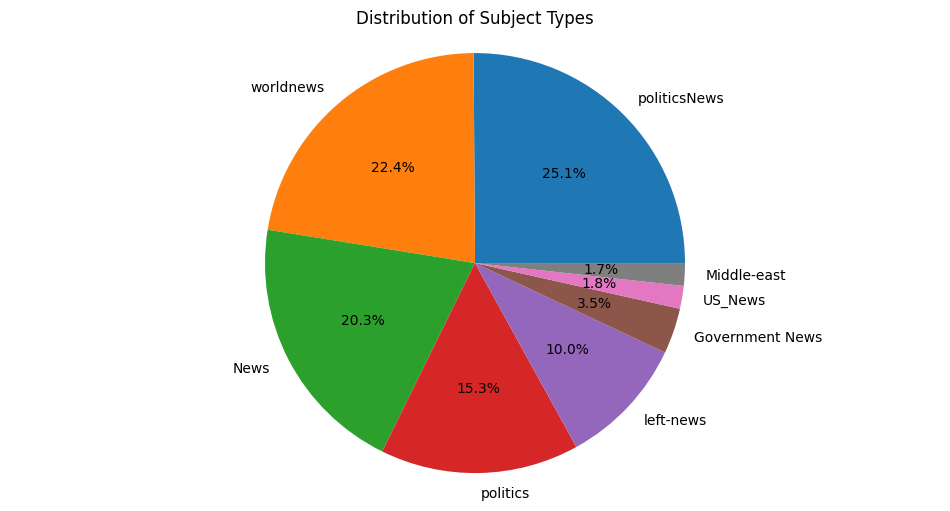

In [21]:
subject_counts = data['subject'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Subject Types')
plt.show()

#### Relevant analysis: distribution of true and fake news over the years

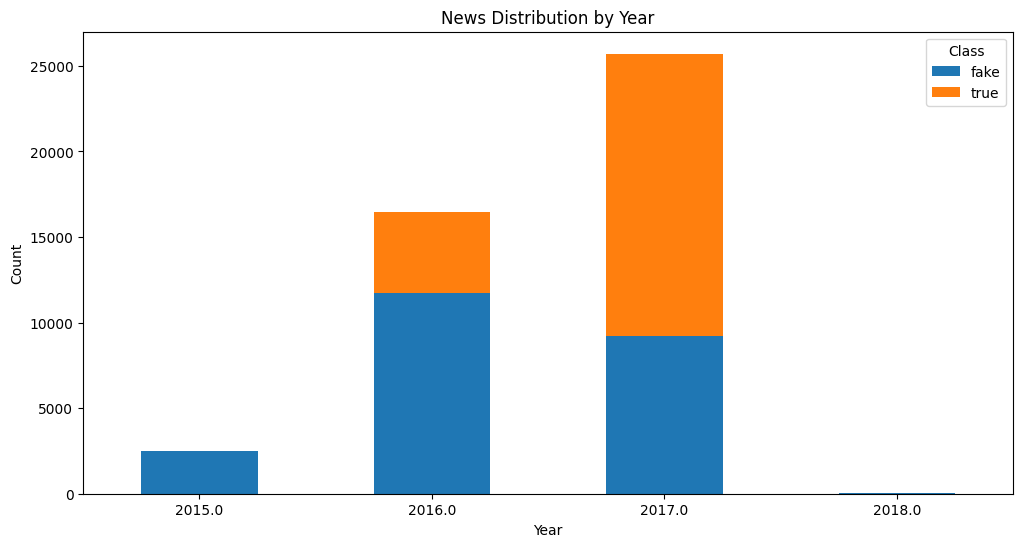

class    fake   true
year                
2015.0   2478      0
2016.0  11754   4701
2017.0   9201  16510
2018.0     35      0


In [25]:
yearly_counts = data.groupby(['year', 'class']).size().unstack(fill_value=0)
yearly_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('News Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.show()
print(yearly_counts)

#### Relevant analysis: distribution of true and fake news for each subject

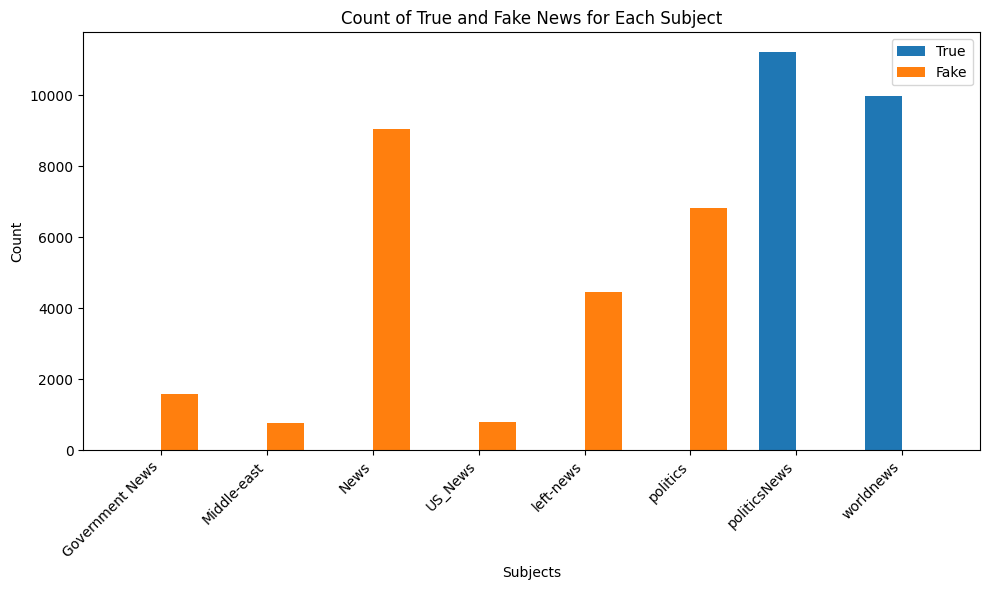

In [27]:
subject_validity = data.groupby(['subject', 'class']).size().unstack(fill_value=0)
# print(subject_validity)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Get the list of subjects
subjects = subject_validity.index

# Get the positions for the bars
true_pos = range(len(subjects))
fake_pos = [x + bar_width for x in true_pos]

ax.bar(true_pos, subject_validity['true'], bar_width, label='True')
ax.bar(fake_pos, subject_validity['fake'], bar_width, label='Fake')

ax.set_xlabel('Subjects')
ax.set_ylabel('Count')
ax.set_title('Count of True and Fake News for Each Subject')
ax.set_xticks([p + bar_width / 2 for p in true_pos])
ax.set_xticklabels(subjects, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()